# Plagirism Declaration:
I ,Salmaan Kamaloodien, state that this work is my own work and done independantly. None of the following was taken as passed as my own. Some parts were provided to us in examples, but have been adapted to suit the needs of this assignment.


Signed: S. Kamaloodien on 2021/06/15

In [1]:
using PyPlot
using FFTW


# KMLSAL001_3092F_Assignment2_Exercises_Section_6.x

## Task 6.1
### a)
#### i)

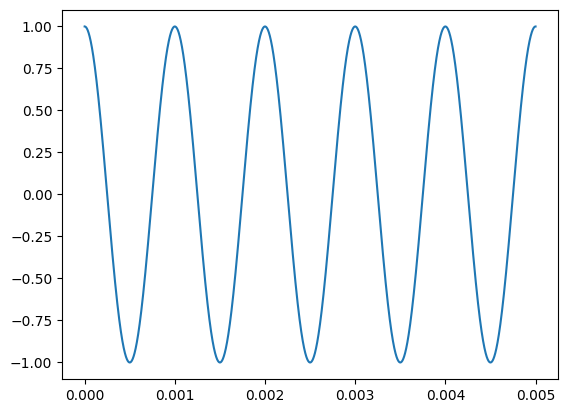

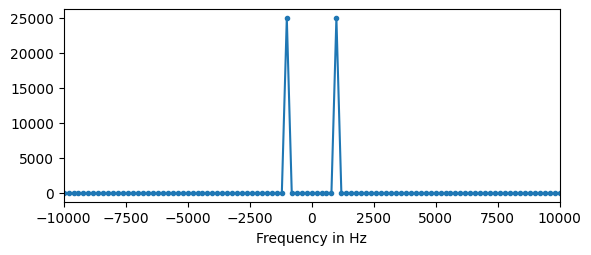

(-10000.0, 10000.0)

In [2]:
dt= 0.0000001;
t = 0:dt:0.005;

fm=1000;

myfunction(t) = cos.(2*π*fm*t);#
ft=myfunction(t);
figure();
plot(t,ft);

amr=fft(ft);

function freqplt(func,tf,dtf)###might be used later
    #Label the frequency axis in Hz
    N = length(tf);
    df = 1/(N*dtf)  # spacing in frequency domain

    #create array of freq values stored in f_axis. 
    if mod(N,2)==0    # case N even
        f_axis = (-N/2:N/2-1)*df;    
    else   # case N odd
        f_axis = (-(N-1)/2 : (N-1)/2)*df; 
    end

    figure(figsize=(6.4,2.5)); 
    plot(f_axis, fftshift(abs.(func)),".-");
    xlabel("Frequency in Hz");
    #xlim(-25*length(f_axis), 25*length(f_axis))
end   
freqplt(amr,t,dt);
xlim(-10000, 10000)


#### ii)

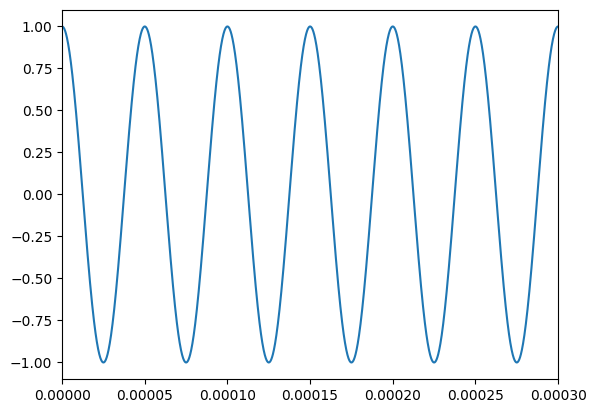

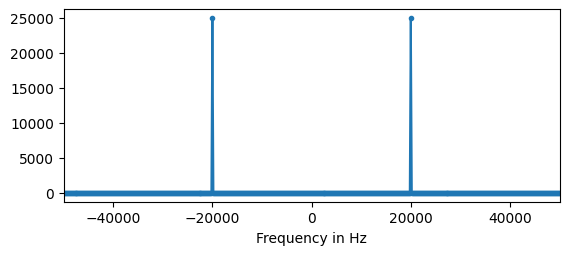

In [3]:
fc=20000;
myfunction(t) = cos.(2*π*fc*t);
fct=myfunction(t);
figure();
plot(t,fct);
xlim(0,0.0003);
ac=fft(fct);
freqplt(ac,t,dt);
xlim(-50000,50000);

#### iii)

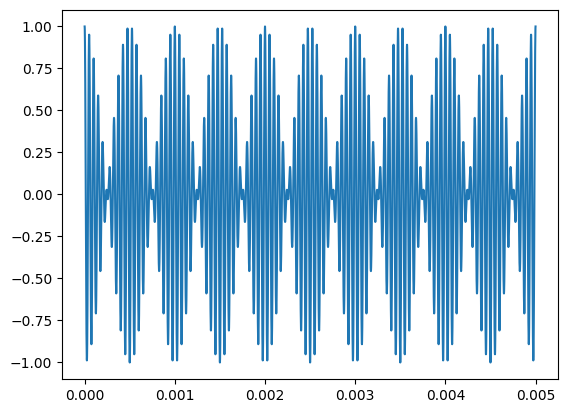

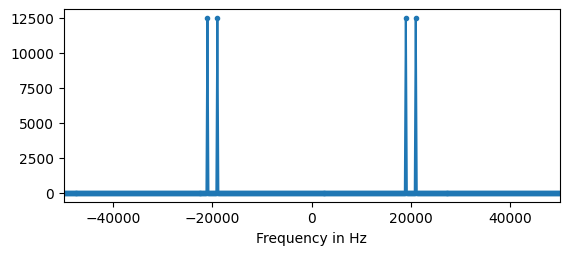

In [4]:
amc=ft.*fct;
figure();
plot(t,amc);
freqplt(fft(amc),t,dt);
xlim(-50000,50000);

##### questions:
If fm is changed (in this case double) the diracs will change position relative to fm accodingly (this case twice the distance)
If the amplitude is doubled then the magnitude of the dircas will increase as shown below

ie: $\phi_{double}(t) =f_{double}(t)*carrier =2f_{initial}(t)*carrier=2\phi(t)$ 

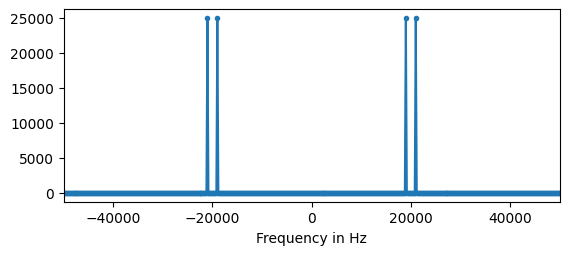

In [5]:
freqplt(fft(2*amc),t,dt);
xlim(-50000,50000);

#### iv)

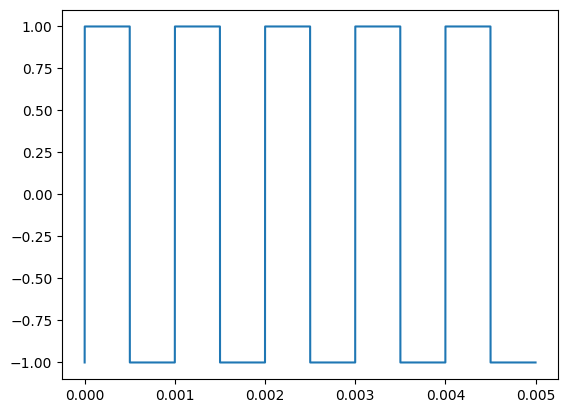

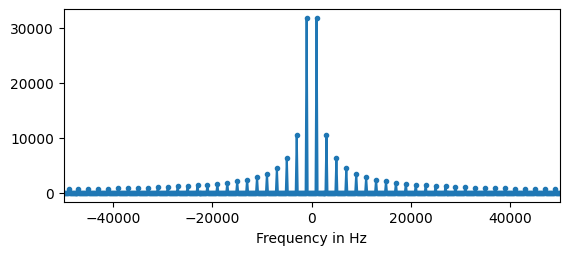

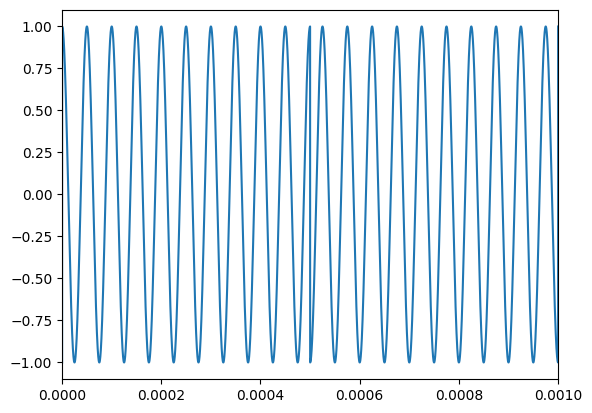

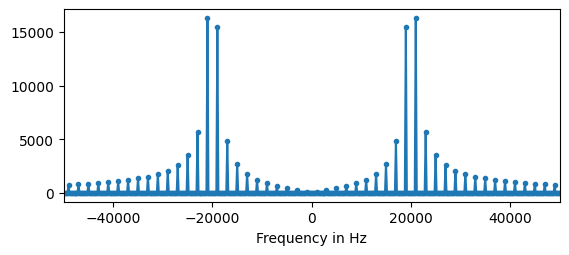

In [6]:

myfunction(t)= ((sin.(2*pi*fm*t).> 0).-0.5)*2   # square wave -1,+1
sqr=myfunction(t);
figure();
plot(t,sqr);
freqplt(fft(sqr),t,dt);
xlim(-50000,50000);
amcsqr=sqr.*fct;
figure();
plot(t,amcsqr);
xlim(0,0.001);
freqplt(fft(amcsqr),t,dt);
xlim(-50000,50000);

The freuqncies present in $\phi(t)$ are the furrior series frequencies found in a square wave, but centered around the main one and covoluted with the carrier. 

### b)

#### i)

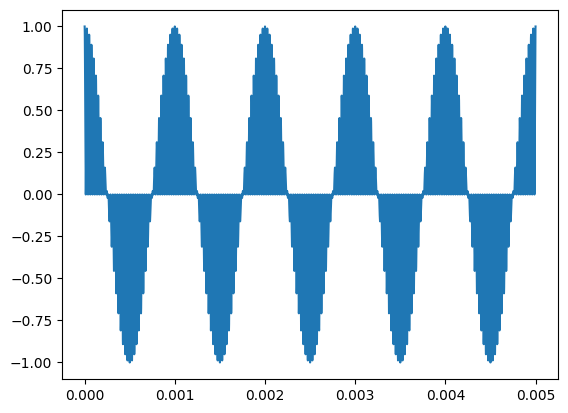

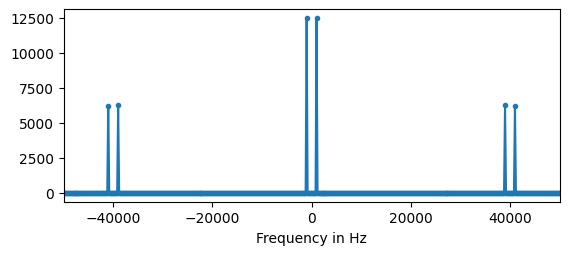

In [7]:
y=amc.*fct;
figure();
plot(t,y);
Y = fft(y);
freqplt(Y,t,dt);
xlim(-50000,50000);

The frequencies present are the shifted (by convolution) frequencies of the DBC-SC waveform. They are convoluted by +/-fc which causes the response to shift so that at the origin the left side of the DSB-SC freq convuluted with the positive demodulating frequency and the right side conv. negative's freqs appear (product). The ones observed above at the origin, is of f(t).

The nuiquist sampling frequency should be twice that of 2fc. Thus the rate should be at a 12.5us sampling-period. My sample rate was high enough.

#### ii)

In [8]:
function lpf(fco,bt,bdt,fshift)#just incase i need another lpf or bpf
    #fco is the cuttoff frequency,bt and bdt are just time inputs,fhisft is the loweer frequency if bandpass
    N= length(bt);
    dw = 2*pi/(N*bdt);   # Sample spacing in freq domain in rad/s
    
    w = -((N-1)*dw)/2:dw:((N-1)*dw)/2
    bf = w./(2*π)
    
    H = (((fshift).<abs.(bf).<(fco+fshift)).*1)#provided code did not work so i had to change it
    #plot(bf,H);#if you want to check it
    #xlim(0,60);
    return bf, H
end

lpf (generic function with 1 method)

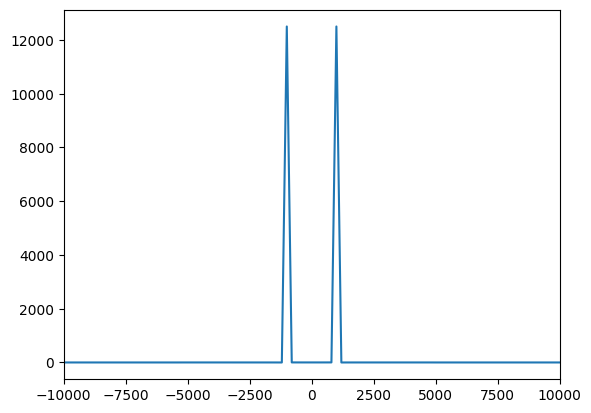

C:\Users\kamik\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [9]:
f_ax,Hlp=lpf(5000,t,dt,0); #makes lpf
V=fftshift(Hlp).*Y;
#println(abs.(V));
figure();

plot(f_ax,fftshift((V)));
xlim(-10000,10000);

Looks like higher frequencies have been filtered out.

#### iii)

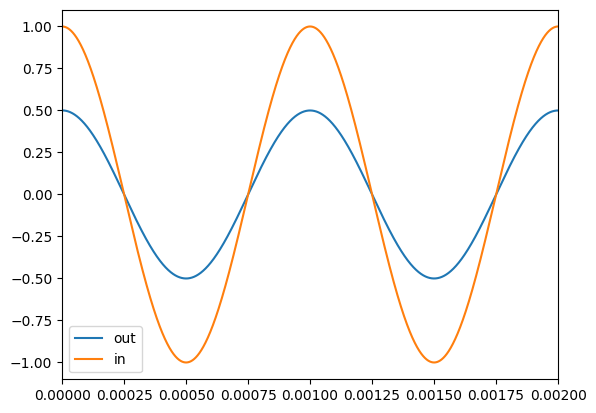

In [10]:
v=real.(ifft((V)));
figure();
plot(t,v,t,ft);
legend(["out","in"]);
xlim(0, 0.002);

Yes the output does agree with the theory, it is 1.0 of the input.
### c) &d)

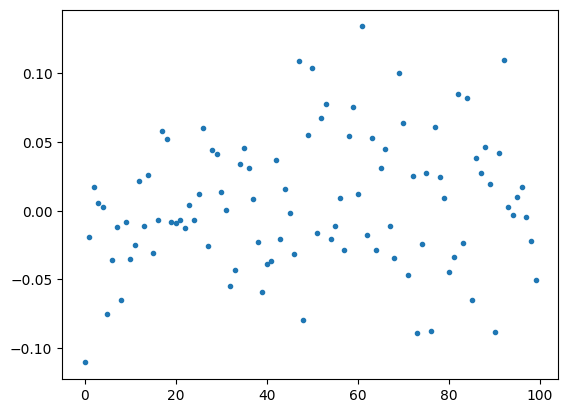

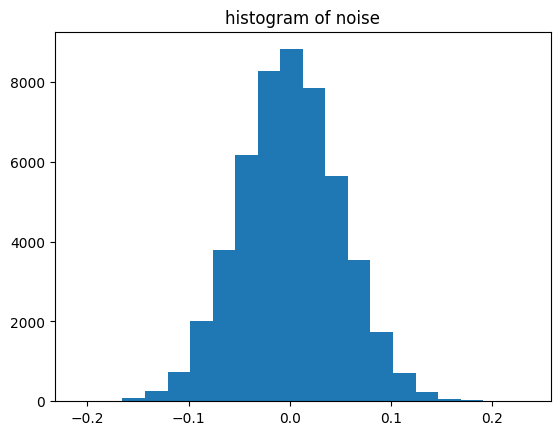

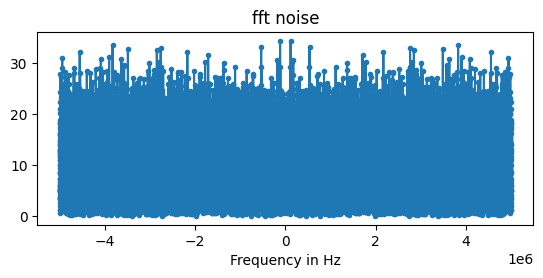

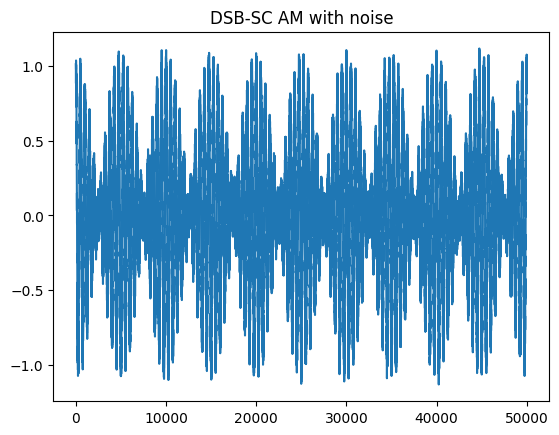

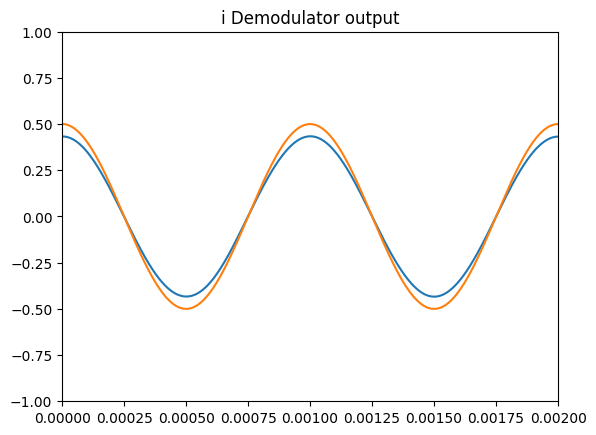

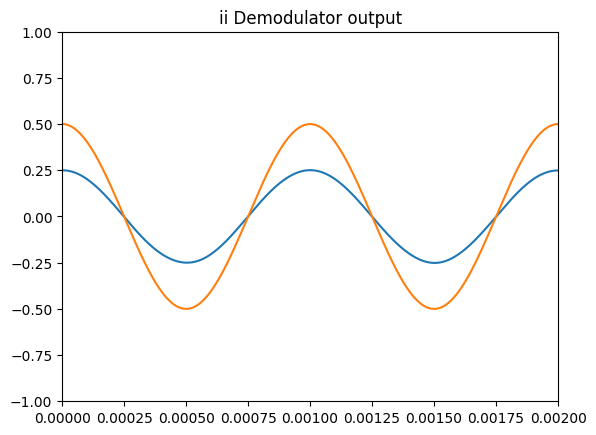

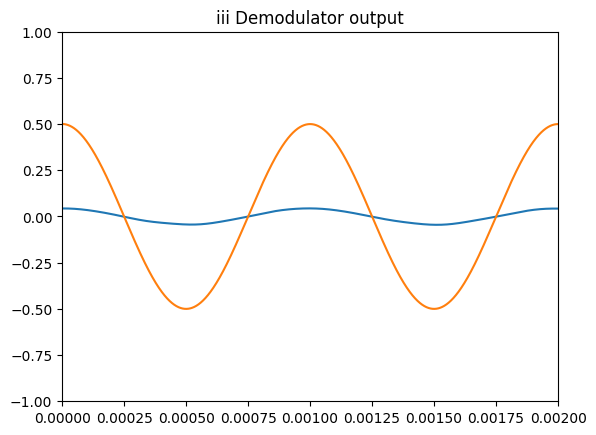

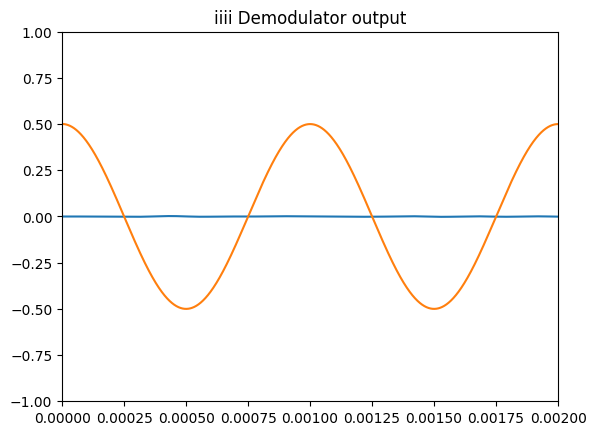

In [11]:
ferr = [30 60 85 90];
amc1=0;
function pltp(X)   #allows to be called again
    figure();plot(X[1:100],".");  #plots some values
    figure();nbins=20; hist(X,nbins); #plots the pretyhistogram
    title("histogram of noise");
end
N=length(t);
noise= 0.05*randn(N);#generated the random number
pltp(noise);
freqplt(fft(noise),t,dt);#was asked to extend the code and the diagram showed with noiseand phase
title("fft noise");
figure();
amc1=amc+noise;
plot(amc1);
title("DSB-SC AM with noise");
i="i";

for fperr in ferr
    myfunction1(t) = cos.(2*pi*fc*t.+(fperr*pi/180));
    fpe=myfunction1(t);
    ype=amc1.*fpe;
    Ype = fft(ype);
    Vpe=fftshift(Hlp).*Ype;
    vpe=real.(ifft((Vpe)));
    figure();
    plot(t,vpe,t,v);
    xlim(0,0.002);
    ylim(-1,1);
    title(i*" Demodulator output");
    i=i*"i";
end

1)A small phase shift wont have much of an effect on the output, but if it is bigger then it will be a huge problem. This is because at the output the phase shift becomes a $cos(\theta)$ multiplied with the normal output. cos is closer to one at smaller angles so it won't have much of an effect then.

2)I would compute the power of each signal (using sum instead of integral) and then devide the two and find the answer in decibels.

## Task 6.2
### a)
#### i)

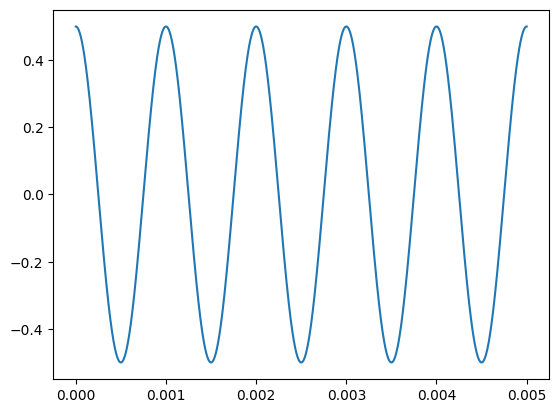

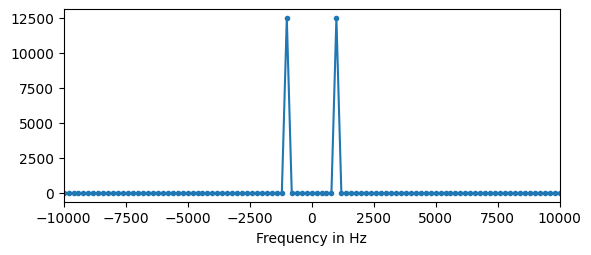

In [12]:
k=0.5;
A=1;
fLCt=k*ft;
figure();
plot(t,fLCt);
LCr=fft(fLCt);
freqplt(LCr,t,dt);
xlim(-10000, 10000);

#### ii)

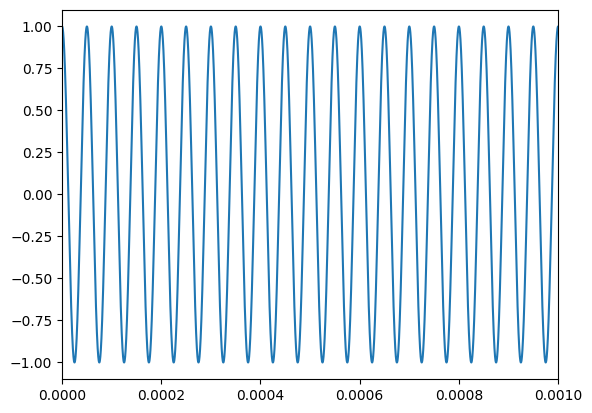

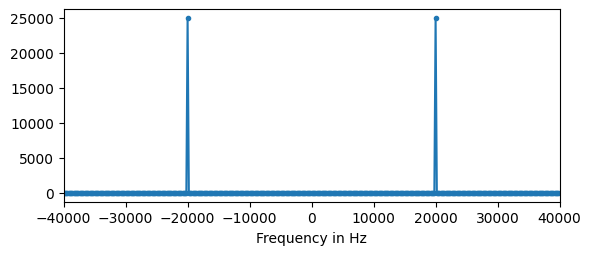

In [13]:
fc=20000;
myfunction(t) = cos.(2*π*fc*t);
fct=myfunction(t);
figure();
plot(t,fct);
xlim(0,0.001);
ac=fft(fct);
freqplt(ac,t,dt);
xlim(-40000, 40000);

#### iii)

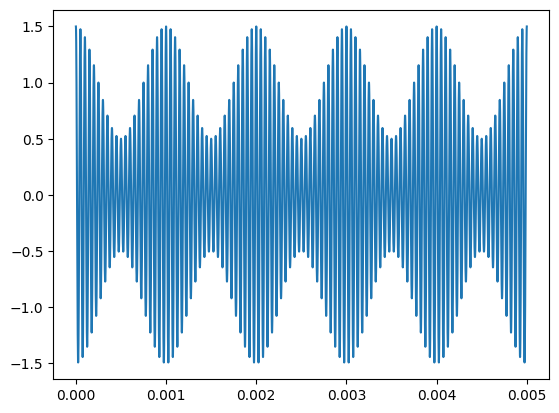

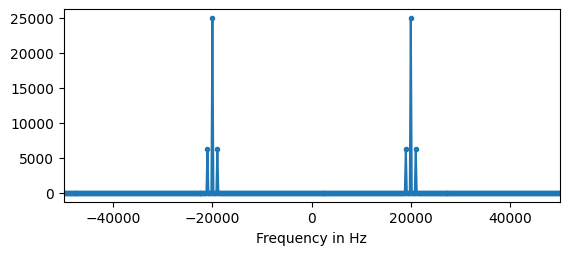

In [14]:
Lc=fLCt.*fct;
Lc= Lc+A*fct;
figure();
plot(t,Lc);
freqplt(fft(Lc),t,dt);
xlim(-50000, 50000);

The frequencies on the sides of the carrier are the modulating signal. (the distance between the fc and those = fm);

Modulation index m: $$m=\frac{k}{A}$$$$=\frac{0.5}{1}$$$$=0.5$$

### b)

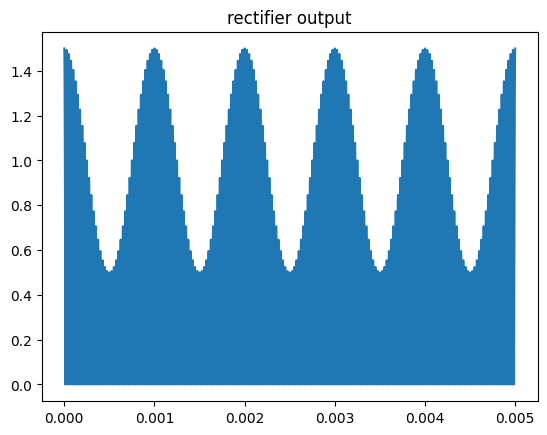

In [15]:
fb=4000;
f_axis,Hbp=lpf(fb,t,dt,200);#200 was used for the bpf because the resolution was very low for the frequency domain due to
 #limitations
Flc=(Lc.>0).*Lc .+(Lc.<0).*-Lc;#Flc behaves as the Full bridge rectifier the abs function gave me problems when
#i tried it the first time, but the next day it worked as required, but I have decided to use my method because it still
figure();                     #works as needed.
plot(t,Flc);
title("rectifier output");

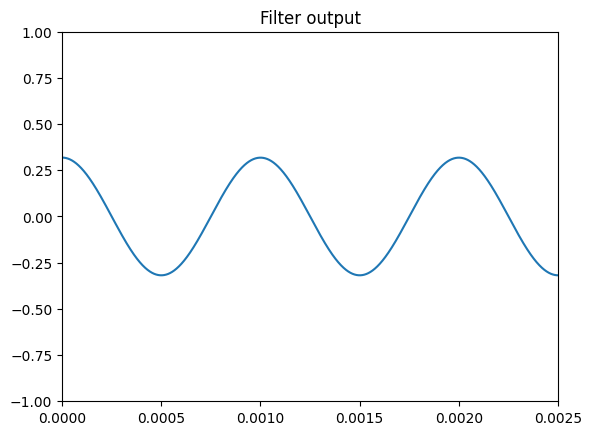

In [16]:
temp=fftshift(Hbp).*(fft(Flc));
out=real.(ifft(temp));
figure();
plot(t,out);
title("Filter output");
xlim(0,0.0025);
ylim(-1, 1);

### c) ii & iii) (c i is done above m=0.5)

In [17]:
karray=[1,2];

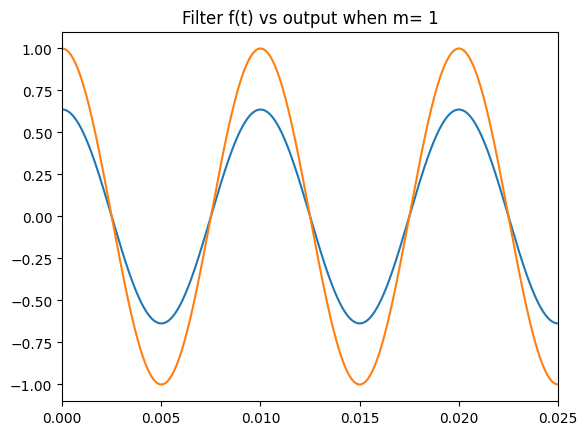

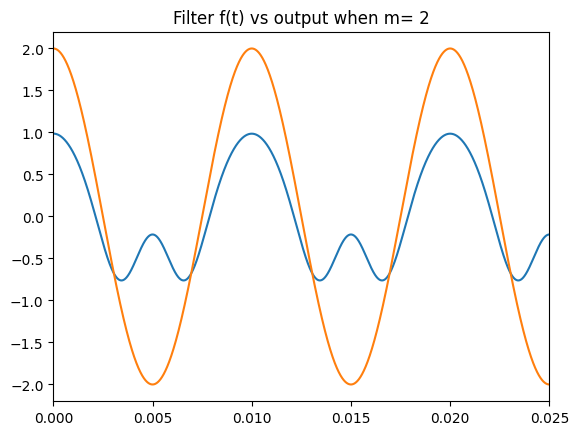

In [37]:
for ks in karray
    A=1;
    fLCtks=ks*ft;
    LCrks=fft(fLCtks);
    Lcks=fLCtks.*fct;#same carrier wave
    Lcks= Lcks+A*fct;
    Flcks=(Lcks.>0).*Lcks .+(Lcks.<0).*-Lcks;
    tempks=fftshift(Hbp).*(fft(Flcks));#same bandpass filter used
    outks=real.(ifft(tempks));
    #outks= ((angle.(tempks).>0).*-abs.(tempks)) ;#back to this, I used my understanding of complex numbers to figure this out
    #outks=outks.+((angle.(tempks).<0).*abs.(tempks));#aswell as its relationship with trig identities3
    figure();
    plot(t,outks,t, fLCtks);
    sks = string(ks);
    title("Filter f(t) vs output when m= "*sks);
    xlim(0,0.025);
    #ylim(-1, 1);
end
    

In conclusion it shows that when m>1 the output waveform distorm.

## Task 6.3

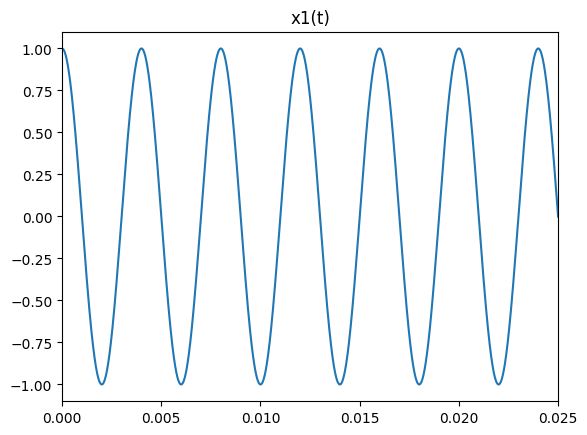

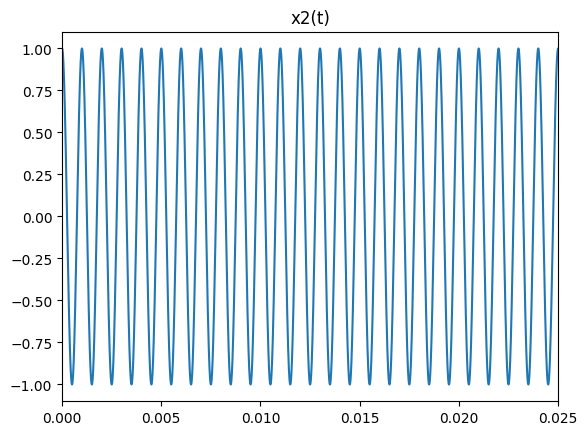

In [20]:
dt= 0.000001;
t = 0:dt:0.05;
fm1 = 250; 
fc1 = 10000;
fm2 = 1000;
x1(t) = cos.(2*π*fm1*t);
ft1=x1(t)
x2(t) = cos.(2*π*fm2*t);
ft2=x2(t)
figure();
plot(t,ft1);
title("x1(t)");
xlim(0,0.025);
figure();
plot(t,ft2);
title("x2(t)");
xlim(0,0.025);

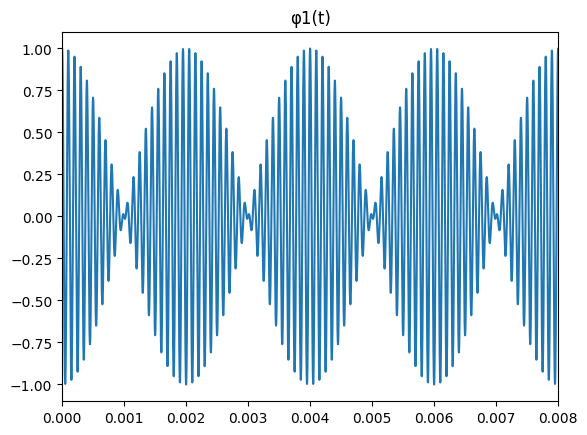

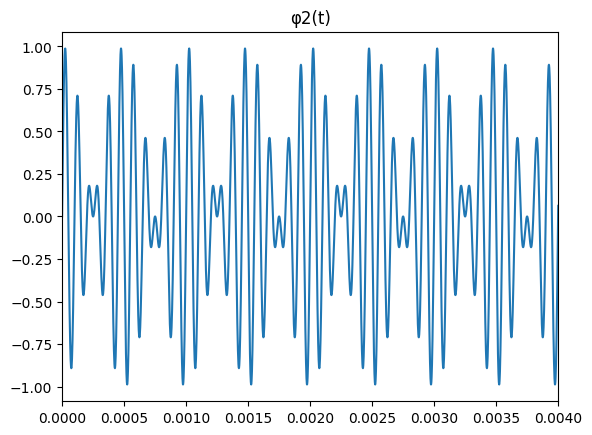

In [21]:
c1(t)=cos.(2*pi*fc1*t);
c2(t)=sin.(2*pi*fc1*t);
phi1=ft1.*c1(t);phi2=ft2.*c2(t);
phi1=phi1;
figure();
plot(t,phi1);
title("φ1(t)");
xlim(0,0.008);
figure();
plot(t,phi2);
title("φ2(t)");
xlim(0,0.004);

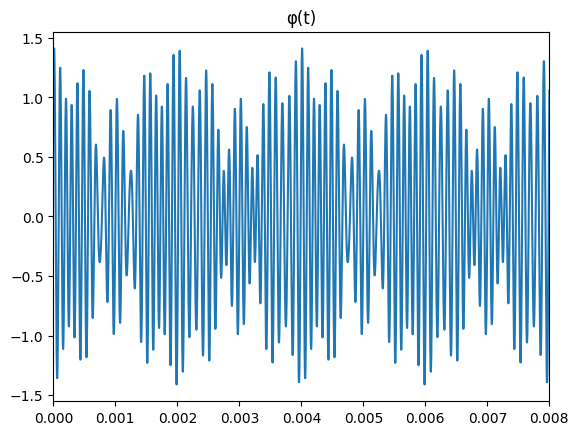

In [22]:
phi=phi1+phi2;
figure();
plot(t,phi);
title("φ(t)");
xlim(0,0.008);


#(φ)

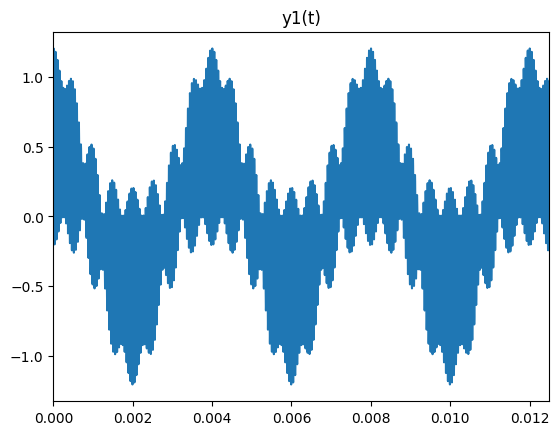

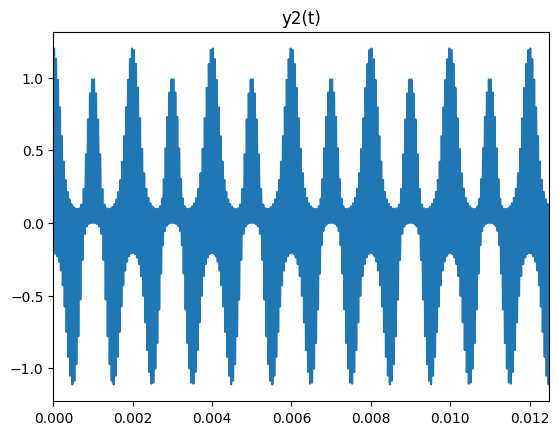

In [23]:
y1=phi.*c1(t);
y2=phi.*c2(t);

figure();
plot(t,y1);
title("y1(t)");
xlim(0,0.0125);
figure();
plot(t,y2);
title("y2(t)");
xlim(0,0.0125);

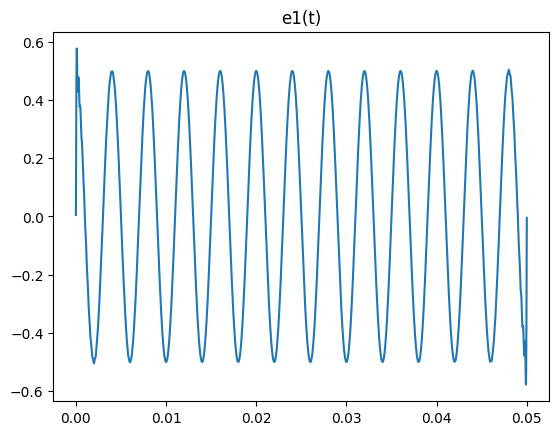

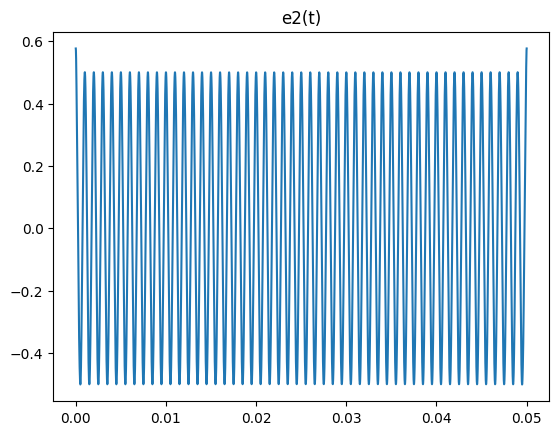

In [24]:
fxa,Hlpf=lpf(5000,t,dt,0);
temp=fftshift(Hlpf).*(fft(y1));
e1=ifft((temp));
plot(t,real.(e1));
title("e1(t)");
#xlim(-20000,20000);
figure();
temp=fftshift(Hlpf).*(fft(y2));
e2=ifft((temp));
plot(t,real.(e2));
title("e2(t)");

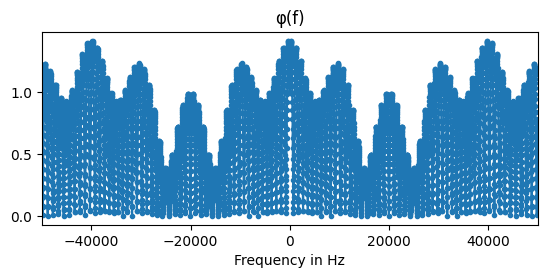

In [25]:
freqplt(phi,t,dt);
xlim(-50000,50000);#looks mad
title("φ(f)");#find capital phi before submit

#### questions

##### 1)

20000samples/second (20kHz)
First we check for 0.5 of the bandwitdth, but the carrier frequency is larger at 10kHZ, applying we nyquist we get 20kHz.

#### 2)
Whichever is bigger.    

#### 3)
The signals will not be perfectly modulated, this will cause distortion in the output.